In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

In [2]:
df = pd.read_csv('../../../data/pokemon.csv')
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB
None


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


### Example 1

##### Step 1: Data wrangling to reshape the pokemon dataframe

To determine the frequency of each type of pokemon, we will perform a `melt` operation to unpivot the DataFrame from wide to long format. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) is further documentation on teh function we will use.

For our specific call, we will do the following to the pokemon dataframe *out of place*. Note that this should double the number of rows for our two types.

1. Select the `id` and `species` columns.
1. Remove the `type_1` and `type_2` columns.
1. Add a new column `type_level` that can have a value of either `type_1` or `type_2`.
1. Add a new column `type` that will contain the value contained by either the original `type_1` or `type_2` columns.

In [3]:
df_types = df.melt(id_vars=['id', 'species'], value_vars=['type_1', 'type_2'], var_name='type_level',value_name='type')
print('Shape after melt (2x the number of rows):', df_types.shape)
df_types.dropna(inplace=True) # Drop the rows with NaNs
print('Shape following dropna:', df_types.shape)
df_types.head(10)

Shape after melt (2x the number of rows): (1614, 4)
Shape following dropna: (1212, 4)


,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire
5,6,charizard,type_1,fire
6,7,squirtle,type_1,water
7,8,wartortle,type_1,water
8,9,blastoise,type_1,water
9,10,caterpie,type_1,bug


##### Step 2 - Find the Frequency of unique values in the `type` column

In [4]:
# Get the frequency counts for the number of each type of pokemon in descending order
type_counts = df_types['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [5]:
# Get the unique values of each type of pokemon in descending order of the frequency
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'ground', 'fire', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

##### Step 3 - Plot the horizontal bar chart

<Axes: xlabel='count', ylabel='type'>

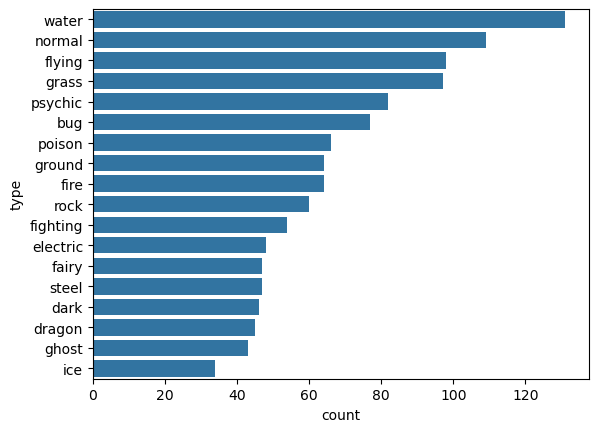

In [6]:
base_color = sns.color_palette()[0]
sns.countplot(data=df_types, y='type', color=base_color, order=type_order)

### Example 2 - Plot the bar chart with the proportions

##### Step 1 - Find the maximum proportion

In [7]:
# Get the total number of pokemon
n_pokemon = df.shape[0]

# Get the highest highest frequency in the type column
max_type_count = type_counts[0]

# Get the maximum proportion, which is the proportion of the largest type count to the number of pokemon
max_prop = max_type_count / n_pokemon
print(max_prop)

0.1623296158612144


##### Step 2 - Create an array of evenly spaced proportioned values

In [8]:
# Establish tick locations and create tick labels
tick_props = np.arange(0, max_prop, 0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16])

##### Step 3 - Create a list of string values that can be used as tick labels

In [9]:
# Use a list comprehension to create tick labels
# `'{:0.2f}'.format(v)` formats the tick label as a float with two decimal places
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10', '0.12', '0.14', '0.16']

##### Step 4 - Plot the bar char with new x-tick labels

Text(0.5, 0, 'proportion')

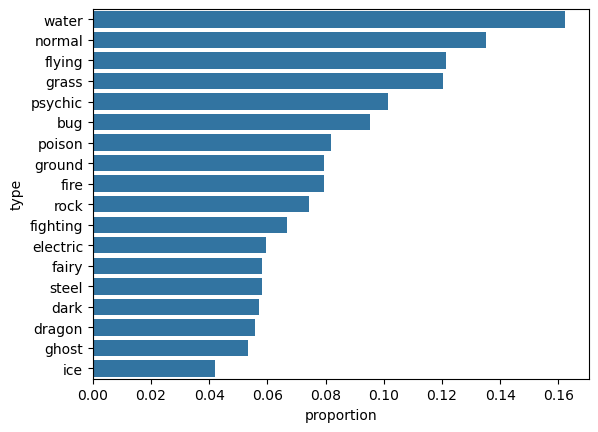

In [10]:
sns.countplot(data=df_types, y='type', color=base_color, order=type_order)
# Change the tick locations and labels
plt.xticks(tick_props * n_pokemon, tick_names)
plt.xlabel('proportion')

### Example 3 - Print the proportion on the bars of a horizontal bar chart

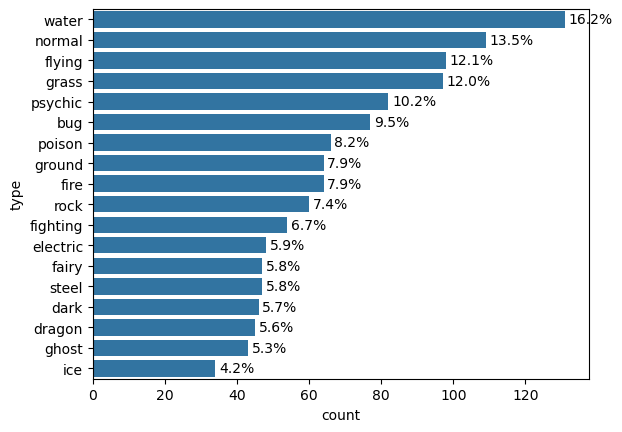

In [11]:
sns.countplot(data=df_types, y='type', color=base_color, order=type_order)

# Print the proportion text on the bars
for i in range(type_counts.shape[0]):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)
    plt.text(count+1, i, pct_string, va='center')
rcParams['figure.figsize'] = 15, 8 # width 15, height 8 (inches) to fit the text labels

### Example 4 - Print the proportions on the bars of a vertical bar chart

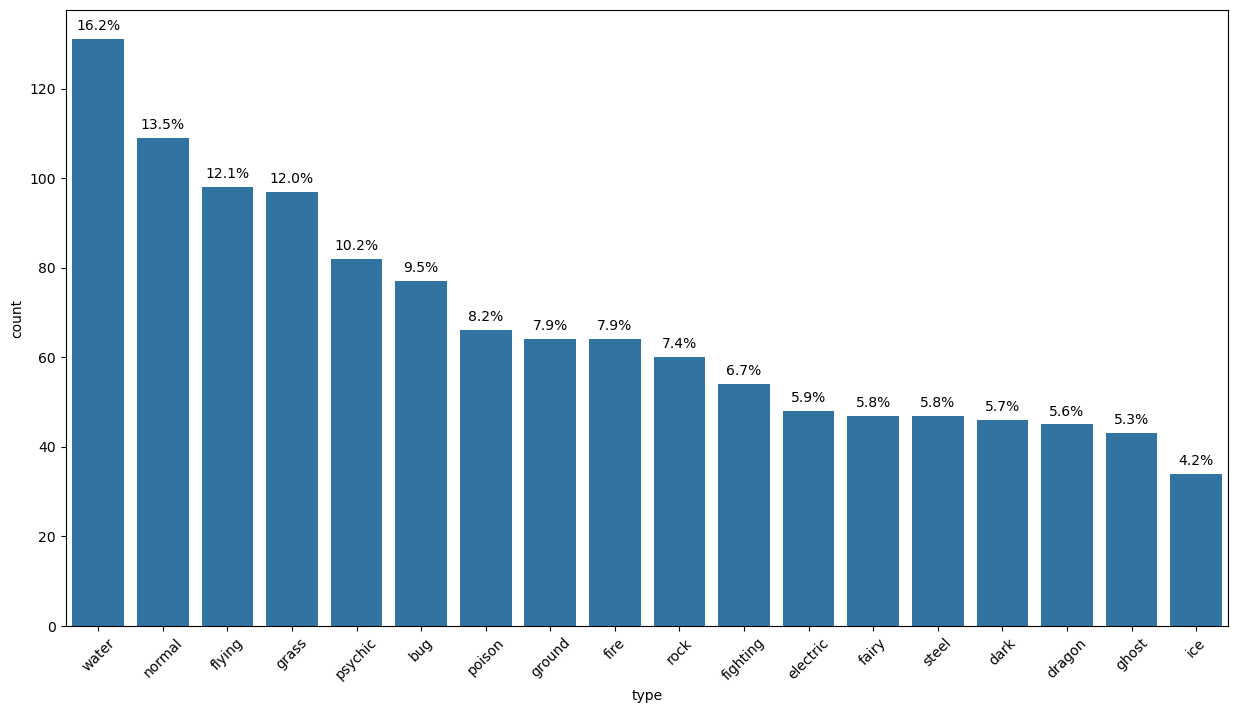

In [12]:
sns.countplot(data=df_types, x='type', color=base_color, order=type_order)

# Get the current tick locations and labels
locs, labels = plt.xticks(rotation=45)

# Loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # Get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # Print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha='center', color='black')